# Анализ временных рядов

Временным рядом называют упорядоченный по времени набор значений. Обычно обозначается, как $X=\left \{X_1, X_2, ..., X_n\right \}$ или как $X=\left \{X_t: t\in T\right \}$, где под T понимают время.

Пример временного ряда: прибыль на акцию для компании Johnson & Johnson

Loading required package: astsa


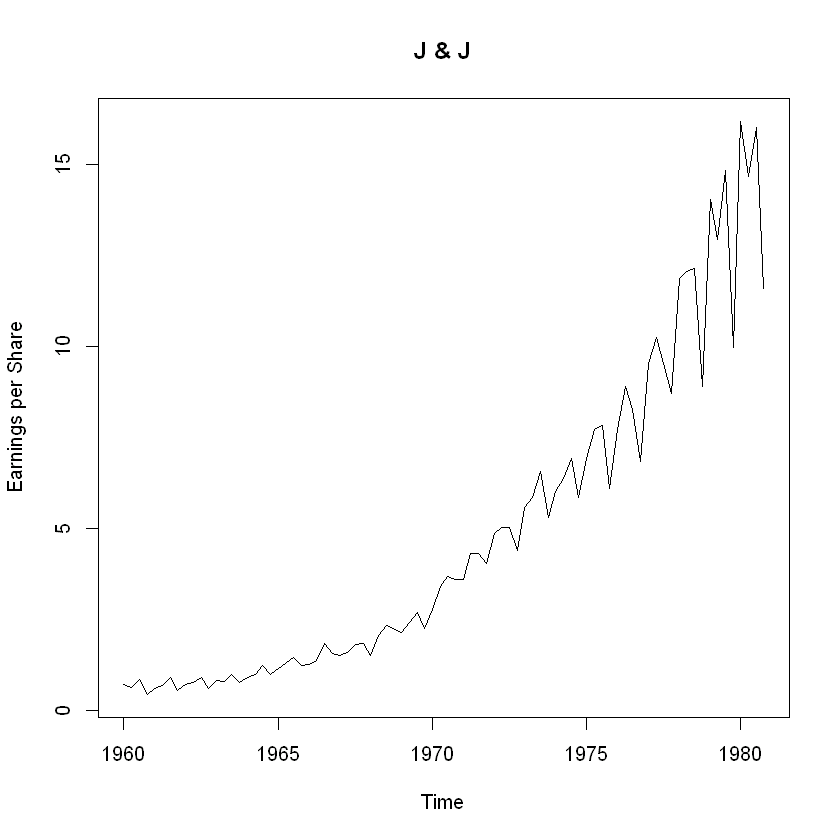

In [1]:
require(astsa)
plot(jj, ylab="Earnings per Share", main="J & J")

Как можно заметить, приведенный выше временной ряд условно можно разделить на несколько составляющих:<br>
1) Сезонная составляющая (повторяемость значений через каждые 4 точки).<br>
2) Тренд - устойчивый рост<br>
3) Случайная составляющая - белый шум<br>

Кроме того, зачастую на временных рядах также можно увидеть дополнительно циклическую составляющую, отличающуюся от сезонности невозможностью точного определения переодичности периода спада/роста <br>
Пример:<img src="http://robjhyndman.com/hyndsight/files/2011/12/cyclets.png">



Верхний график имеет ярко выраженную сезонную составляющую <br>
Средний ряд имеет как сезонность, так и цикличность (повторяющиеся увеличения и уменьшения значений, не имеющие четко определенной продолжительности). <br>
Нижний график имеет две сезонные составляющие (суточную сезонность (по часам внутри одного дня) и недельную сезонность).



На данном занятии мы будем рассматривать задачу построения прогноза для подобных типов временных рядов (т.е. ответа на вопрос, каково будет значение ряда через n моментов времени от ближайшего известного).

Для решения данной задачи нам необходимо построить некую модель того процесса, что описывает исследуемый временной ряд. В дальнейшем мы будем рассматривать только линейные регрессионные модели, как одни из наиболее часто используемых на практике

Для начала дадим несколько базовых определений

Очевидно, что в приведенных выше примерах каждое последующее значение ряда имеет некую статистическую зависимость с предыдущими. <br> 
Одной из мерой такой корреляции называют ковариацию:  

$$cov_{XY}=M[ (X-M[ X]) (Y-M[ Y])]=M[XY]-M[X]M[Y]$$

Некоторые из свойств ковариации:

1) Ковариация 2 независимых $X$ и $Y$ равна 0 <br>
2) $|cov_{XY}|<=\sqrt{D_XD_Y}$ <br>
3) Ковариация имеет размерность равную произведению размерности случайных величин. Т.е. величина ковариации зависит от единиц. измерения независимых величин. <br>

Еще одной мерой корреляции является линейный коэффициент корреляции Пирсона:

$$r_{XY}=\frac{cov_{XY}}{\sigma_{x}\sigma_{y}}=\frac{\sum{(X-\bar{X})(Y-\bar{Y})}}{\sqrt{\sum{(X-\bar{X})^2}\sum{(Y-\bar{Y})^2}}}$$

Автокоррялиционная функция - функция, определяющая сходство между значениями временного ряда, как функция от разницы во времени между ними. Т.е. по сути она описывает корреляцию между членами временного ряда с определенным сдвигом.

Задается формулой:
$$R(t,s)=\frac{M[(X_t-\mu_t)(X_s-\mu_s))]}{\sigma_t\sigma_s}$$
, где $s,t$ - разные моменты времени. <br>
Для временного ряда также можно записать как:
$$\widehat{R}(k)=\frac{1}{(n-k)\sigma^2}\sum_{t=1}^{n-k}{(X_t-\mu)(X_{t+k}-\mu)}$$, где $k$-временной сдвиг,а $\mu$ и $\sigma$ - известны

Графиком автокоррялицонной функции для временного ряда, в зависимости от сдвига называют коррелограммой.

Построим коррелограмму для ряда производства пива в Австралии:

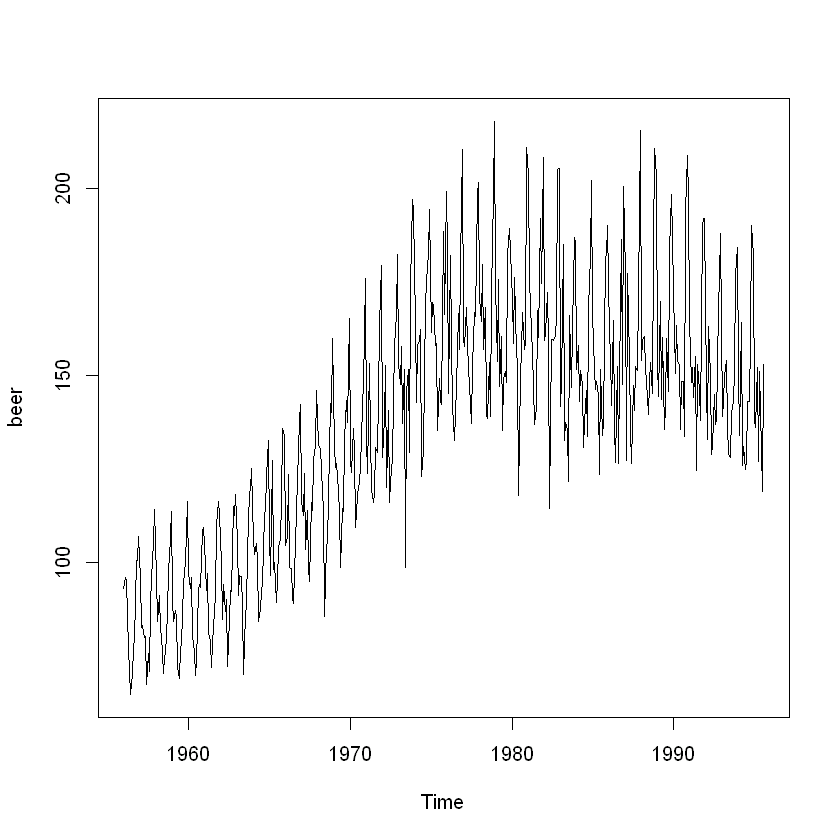

In [22]:
beer<-read.csv("data/beer.csv",header=T,dec=".",sep=";")
beer<-ts(beer[,2],start=1956,freq=12)
plot(beer)

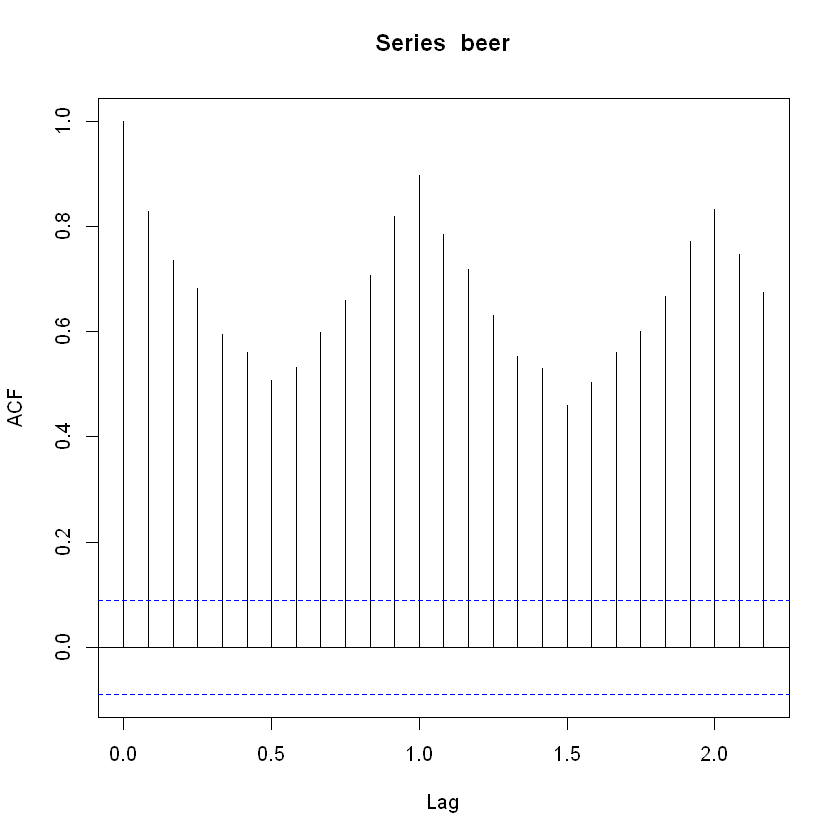

In [23]:
acf(beer)

Как видим, каждое последующее значение зависит как минимум от 20 предыдущих (на графике видны только лаги от 0(корреляция значения с самим собой) до 20-ти ). Синей пунктирной линией на графике обозначены доверительные интервалы для значения автокорреляционной функции (все, что лежит между этими линиями будем считать статистически незначимым).

Также обратим внимание на сезонность на графике коррелограммы. <br>
Попробуем посмотреть на составляющие этого временного ряда более пристально:

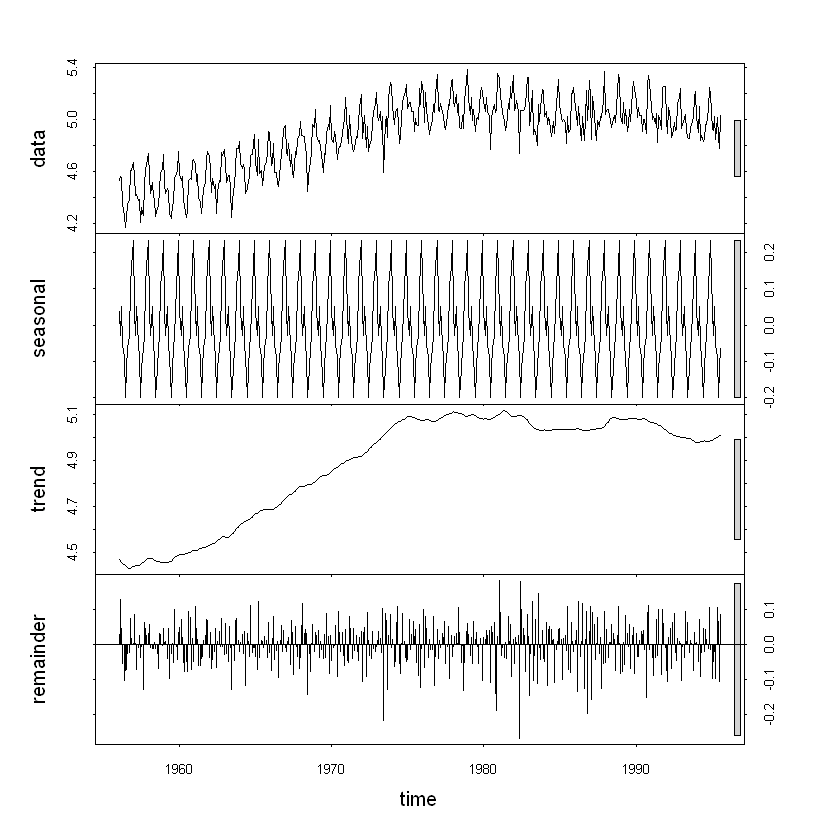

In [24]:
plot(stl(log(beer),s.window="periodic"))

Комманда stl позволяет выделить тренд, сезонность, а также белый шум.

Теперь поробуем посмотреть, насколько хорошо простая линейная регрессия сможет описать приведенный временной ряд:


Call:
lm(formula = lbeer ~ t)

Coefficients:
(Intercept)            t  
     3.2974       0.9772  


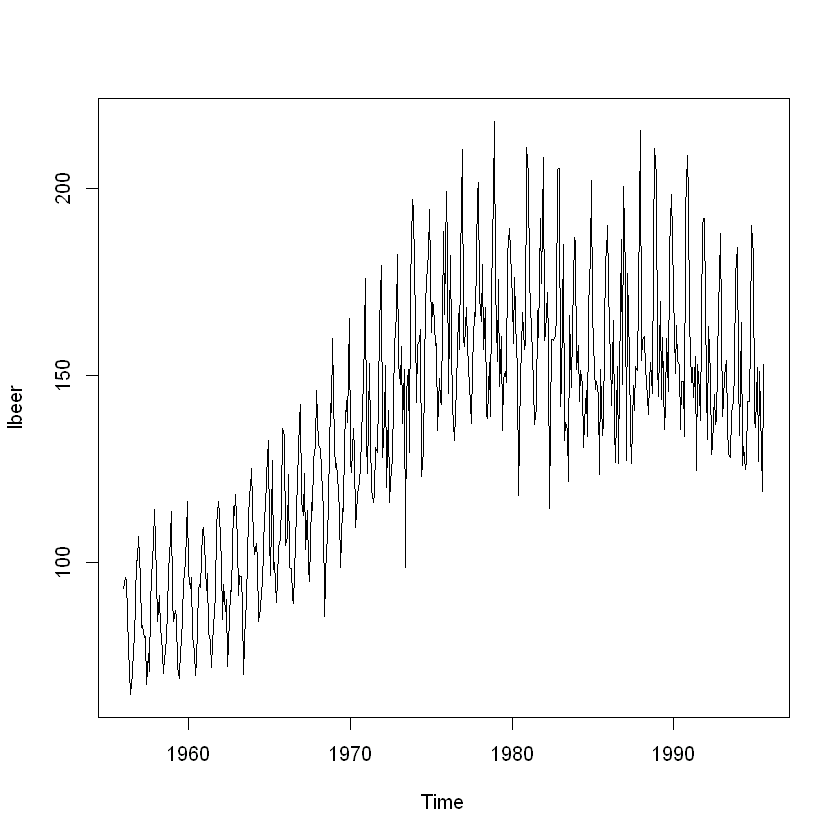

ERROR: Error in stl(lm(lbeer ~ t + t2)$fit): series is not periodic or has less than two periods


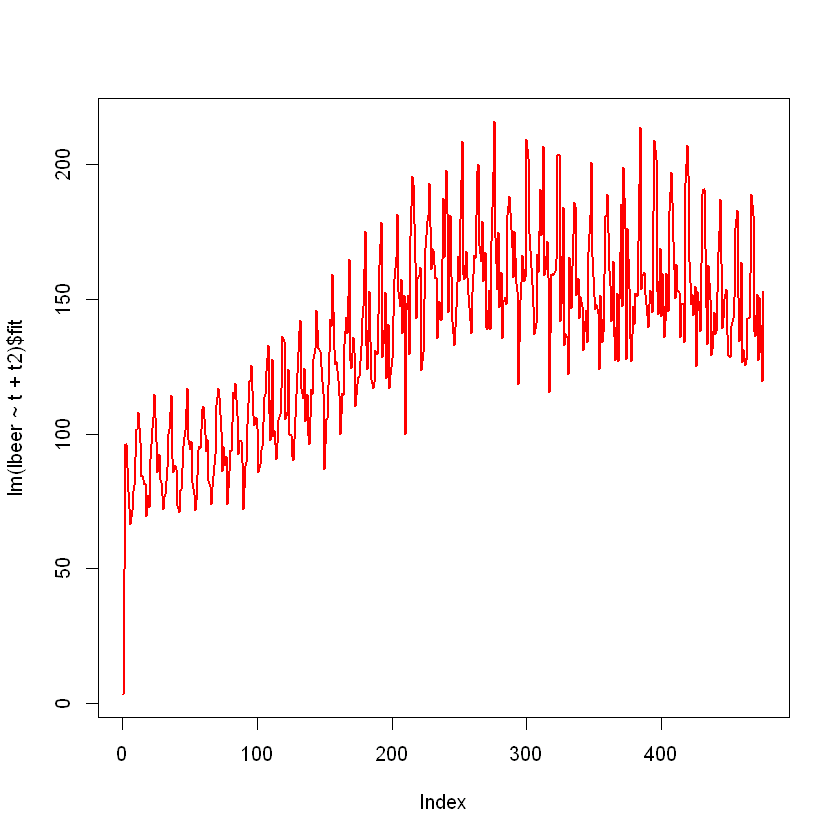

In [59]:
lbeer<-beer
t<-c(0,lbeer[2:length(lbeer)])
t2<-c(0,0,lbeer[3:length(lbeer)])
t3<-c(0,0,0,lbeer[4:length(lbeer)])
plot(lbeer)
lm(lbeer~t)
#notebook не может в lines, поэтомо для красивого графика нужно в RStudio выполнить комманду  
#lines(lm(lbeer~t+t2)$fit,col='red',lwd=2) вместо
plot(lm(lbeer~t+t2)$fit,col='red',lwd=2, type='l')
stl(lm(lbeer~t+t2)$fit)

Для интерполяции такая модель неплохо подходит (если не считать проблем с сезонностью + смещенность значений). Но для прогноза она явно не годится.

Для демонстрации будет использовать встроенную в R функцию авторегрессии (в целом аналогична приведенному выше подходу, за исключением смещения на выборочное среднее) <br>
https://stat.ethz.ch/R-manual/R-devel/library/stats/html/ar.html

In [68]:
beer.fit = ar(beer, order.max = 3)

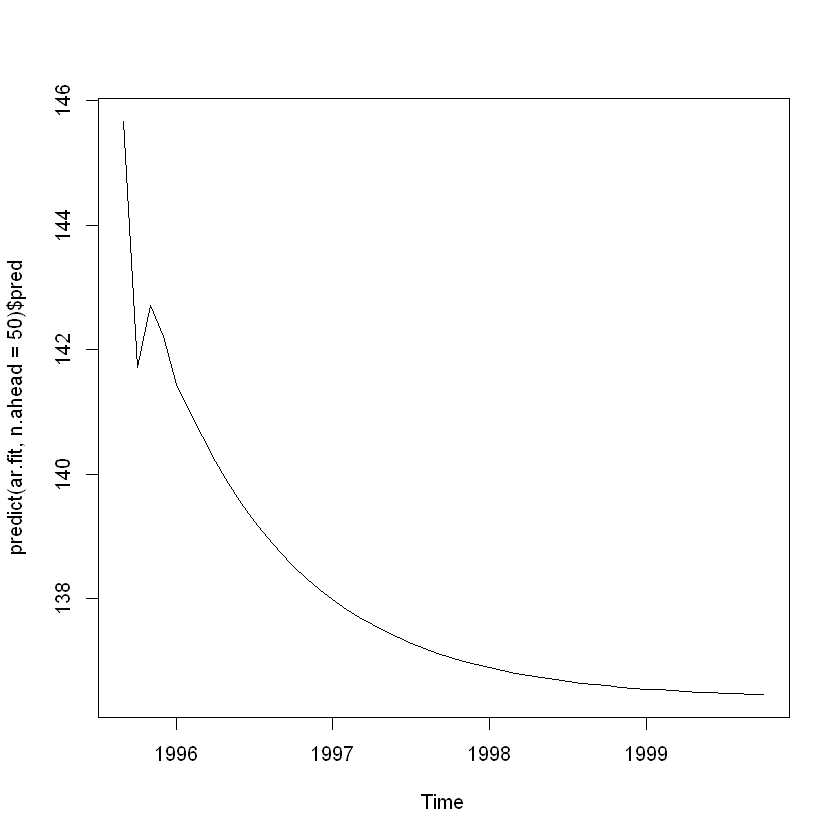

In [70]:
plot(predict(beer.fit, n.ahead = 50)$pred)

Увеличение компонент в регрессии несколько спасает положение, но все равно недостаточно: 

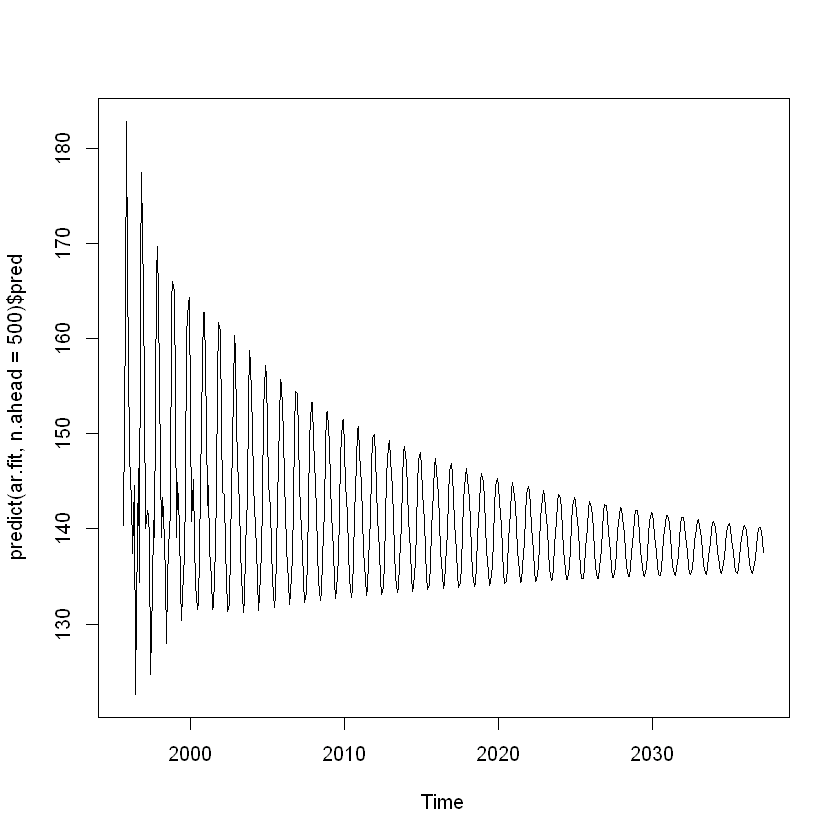

In [75]:
beer.fit = ar(beer)
plot(predict(beer.fit, n.ahead = 500)$pred)

Основная проблема состоит в том, что в пределе значение прогноза стремиться к мат. ожиданию ряда. + при обычной линейной регрессии проблематично учесть цикличность или множественную сезонность.
Кроме того, вполне возможна ситуация, когда ошибки в построенной модели на самом деле скоррелированны друг с другом (т.е. не вся информация учтена при построении модели). Поэтому на практике чаще используют модель авторегрессии интегрированного скользящего среднего (ARIMA).

Вкратце про модели:

AR(q) (авторегрессия порядка q):
$$X_t=c+\sum_{i=1}^{p}{\varphi_iX_{t-i}+\epsilon_t}$$, где $\varphi_1, \varphi_2, ..., \varphi_i$ - параметры модели, а $с$ - константа

MA(p) (скользящее среднее порядка p):
$$X_t=\sum_{i=1}^{q}{\theta_i\epsilon_{t-1}}+\epsilon_t$$, где $\theta_1, \theta_2, ..., \theta_i$ - параметры модели, $\epsilon_1, \epsilon_2, ..., \epsilon_i$ - ошибки

Модель ARMA(q,p):
$$X_t=c+\sum_{i=1}^{p}{\varphi_iX_{t-i}+\epsilon_t} + \sum_{i=1}^{q}{\theta_i\epsilon_{t-1}}+\epsilon_t$$

Модель ARIMA(q,d,p):
$$\Delta^d X_t=c+\sum_{i=1}^{p}{\varphi_i\Delta^dX_{t-i}+\epsilon_t} + \sum_{i=1}^{q}{\theta_i\epsilon_{t-1}}+\epsilon_t$$, где $\Delta^d$ - конечная разность порядка $d$ между членами ряда

Конечная разность в модели нужна для того, чтобы учесть нестационарность ряда (т.е. сделать так, чтобы модель не пыталась построить прогноз с учетом того, что его мат. ожидание равно выборочному среднему от уже имеющихся значений)

Как подбирать параметры для модели?

На самом деле, все и просто и сложно одновременно, поскольку 100% способа подобрать наилучшие с точки зрения человека параметры почти не существует (кроме полного перебора). Но, мы можем использвать функции автокорреляции и частичной автокорреляции для выбора наиболее подходящих на первый взгляд параметров.

Частичная автокорреляция очень похожа на обычную автокорреляционную функцию. Единственное различие состоит в том, что функция находит между  членами ряда с учетом линейных зависимостей (т.е. удаляет компанент линейной регрессии из всех членов ряда и затем строит коррелограмму). На эту функцию смотрят, когда пытаются подобрать параметр $q$

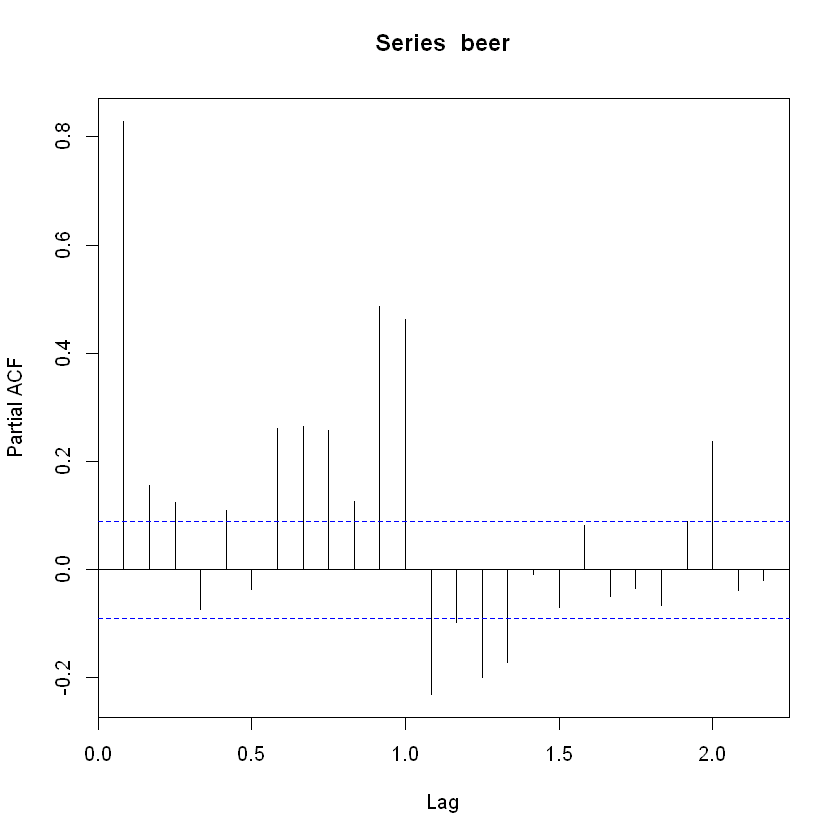

In [76]:
pacf(beer)

Коррелограмму используют для подбора параметра $p$

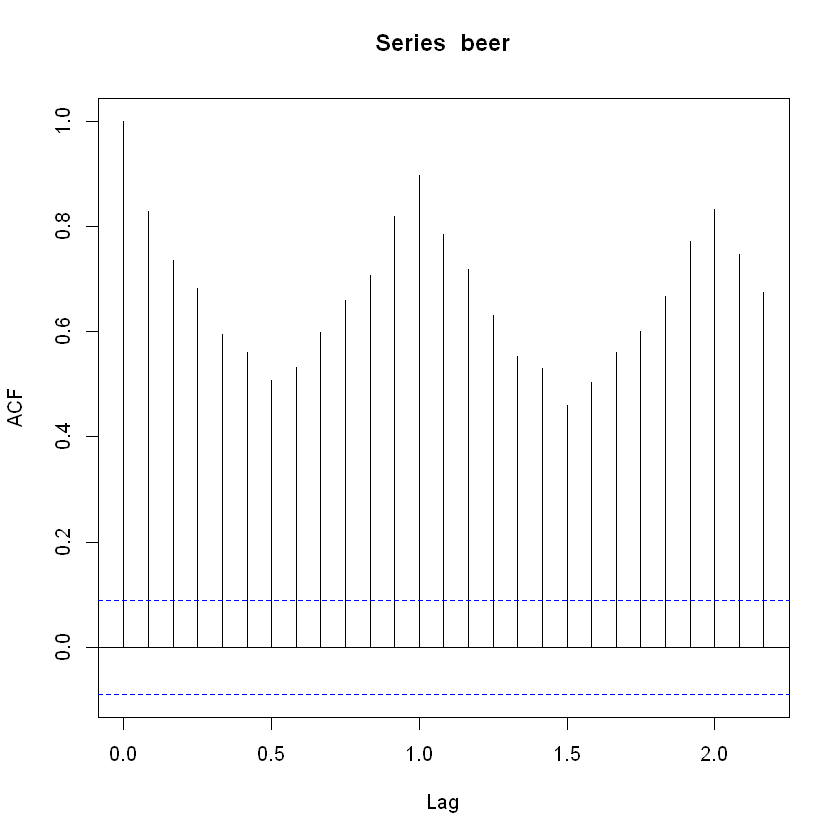

In [120]:
acf(beer)

Однако, к сожалению, правила подбора моделей вречную крайне сложны и данный процесс больше похож на исскуство (подробнее тут http://people.duke.edu/~rnau/arimrule.htm и тут http://stats.stackexchange.com/questions/83322/arima-model-identification), чем на четко отлаженный механизм. Поэтому для выбора моделей часто используют т.н. информационные критерии.

Критерий AIC:
$$AIC=2K+n[ln(\widehat\sigma^2)]$$, где $\widehat\sigma^2=\frac{SSE}{T-2}$ и $SSE=\sum_{T}^{t=1}{(X_t-X_t')^2}$, а $K$-число параметров модели

Критерий BIC:
$$BIC=n[ln(\frac{SSE}{n})]+K[ln(n)]$$, где $n$ - размер выборки (временного ряда в нашем случае), по которому строиться модель

BIC дополнительно предпологает, что распределение наблюдаемых значений принадлежит к классу экспоненциальных распределений.

AIC можно использовать при сравнении моделей из разных семейств, а BIC только для сравнения моделей одного семейства (отличающихся только параметрами модели)

Выбирать нужно ту модель, которой соответствует меньшей значение информационного критерия

In [161]:
arima(beer, order=c(6,1,3), seasonal=list(order=c(1,0,1), period=7))
arima(beer, order=c(6,1,3), seasonal=list(order=c(2,0,1), period=7))



Call:
arima(x = beer, order = c(6, 1, 3), seasonal = list(order = c(1, 0, 1), period = 7))

Coefficients:
         ar1      ar2      ar3      ar4      ar5      ar6     ma1      ma2
      -1.119  -0.4476  -0.0021  -0.2691  -0.1269  -0.2079  0.6736  -0.4451
s.e.   0.058   0.1007   0.1255   0.0864   0.0807   0.0559  0.0414   0.0491
          ma3     sar1     sma1
      -0.7312  -0.2464  -0.3038
s.e.   0.0435   0.1455   0.1218

sigma^2 estimated as 219.7:  log likelihood = -1957.2,  aic = 3938.39


Call:
arima(x = beer, order = c(6, 1, 3), seasonal = list(order = c(2, 0, 1), period = 7))

Coefficients:
         ar1      ar2     ar3      ar4     ar5      ar6      ma1     ma2
      1.2864  -0.8346  0.2998  -0.4159  0.2781  -0.3355  -2.3667  2.0898
s.e.  0.0662   0.0913  0.0904   0.0875  0.0799   0.0529   0.0530  0.0917
          ma3    sar1    sar2     sma1
      -0.6446  0.5352  -0.191  -0.3985
s.e.   0.0497  0.2819   0.060   0.2909

sigma^2 estimated as 139.7:  log likelihood = -1852.35,  aic = 3730.69

Как видно из примера выше, из двух моделей лучше первая (по aic).

Построим прогноз с доверительными интервалами (за стандартное отклонение тут принято соответствующее значие $\epsilon_t$ из формулы модели ARIMA) (двухсторонний доверительный интервал с 2-мя $\epsilon_t$ с каждой стороны).

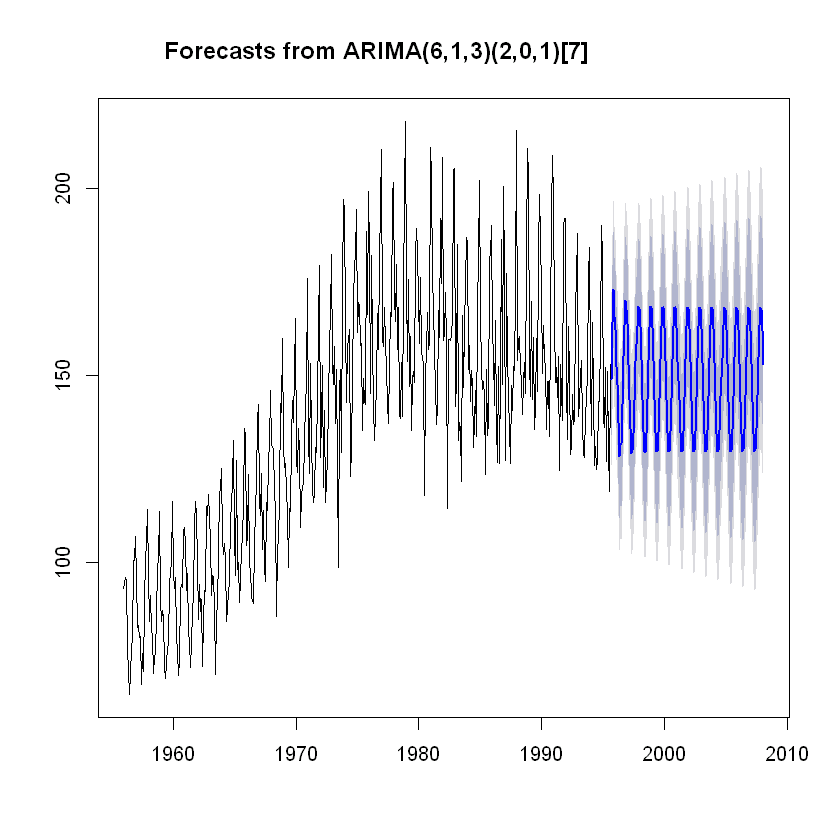

In [152]:
model = arima(beer, order=c(6,1,3), seasonal=list(order=c(2,0,1), period=7))
plot(forecast(model, h = 150))